In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf

In [2]:
data=pd.read_csv('50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df=data.rename({'R&D Spend':'RDS','Administration':'ADM','Marketing Spend':'MS',
                'State':'ST','Profit':'Profit'},axis=1)
df

,RDS,ADM,MS,ST,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# EDA

In [4]:
df.describe()

,RDS,ADM,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RDS     50 non-null     float64
 1   ADM     50 non-null     float64
 2   MS      50 non-null     float64
 3   ST      50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.duplicated().sum()

0

# Correlation Analysis

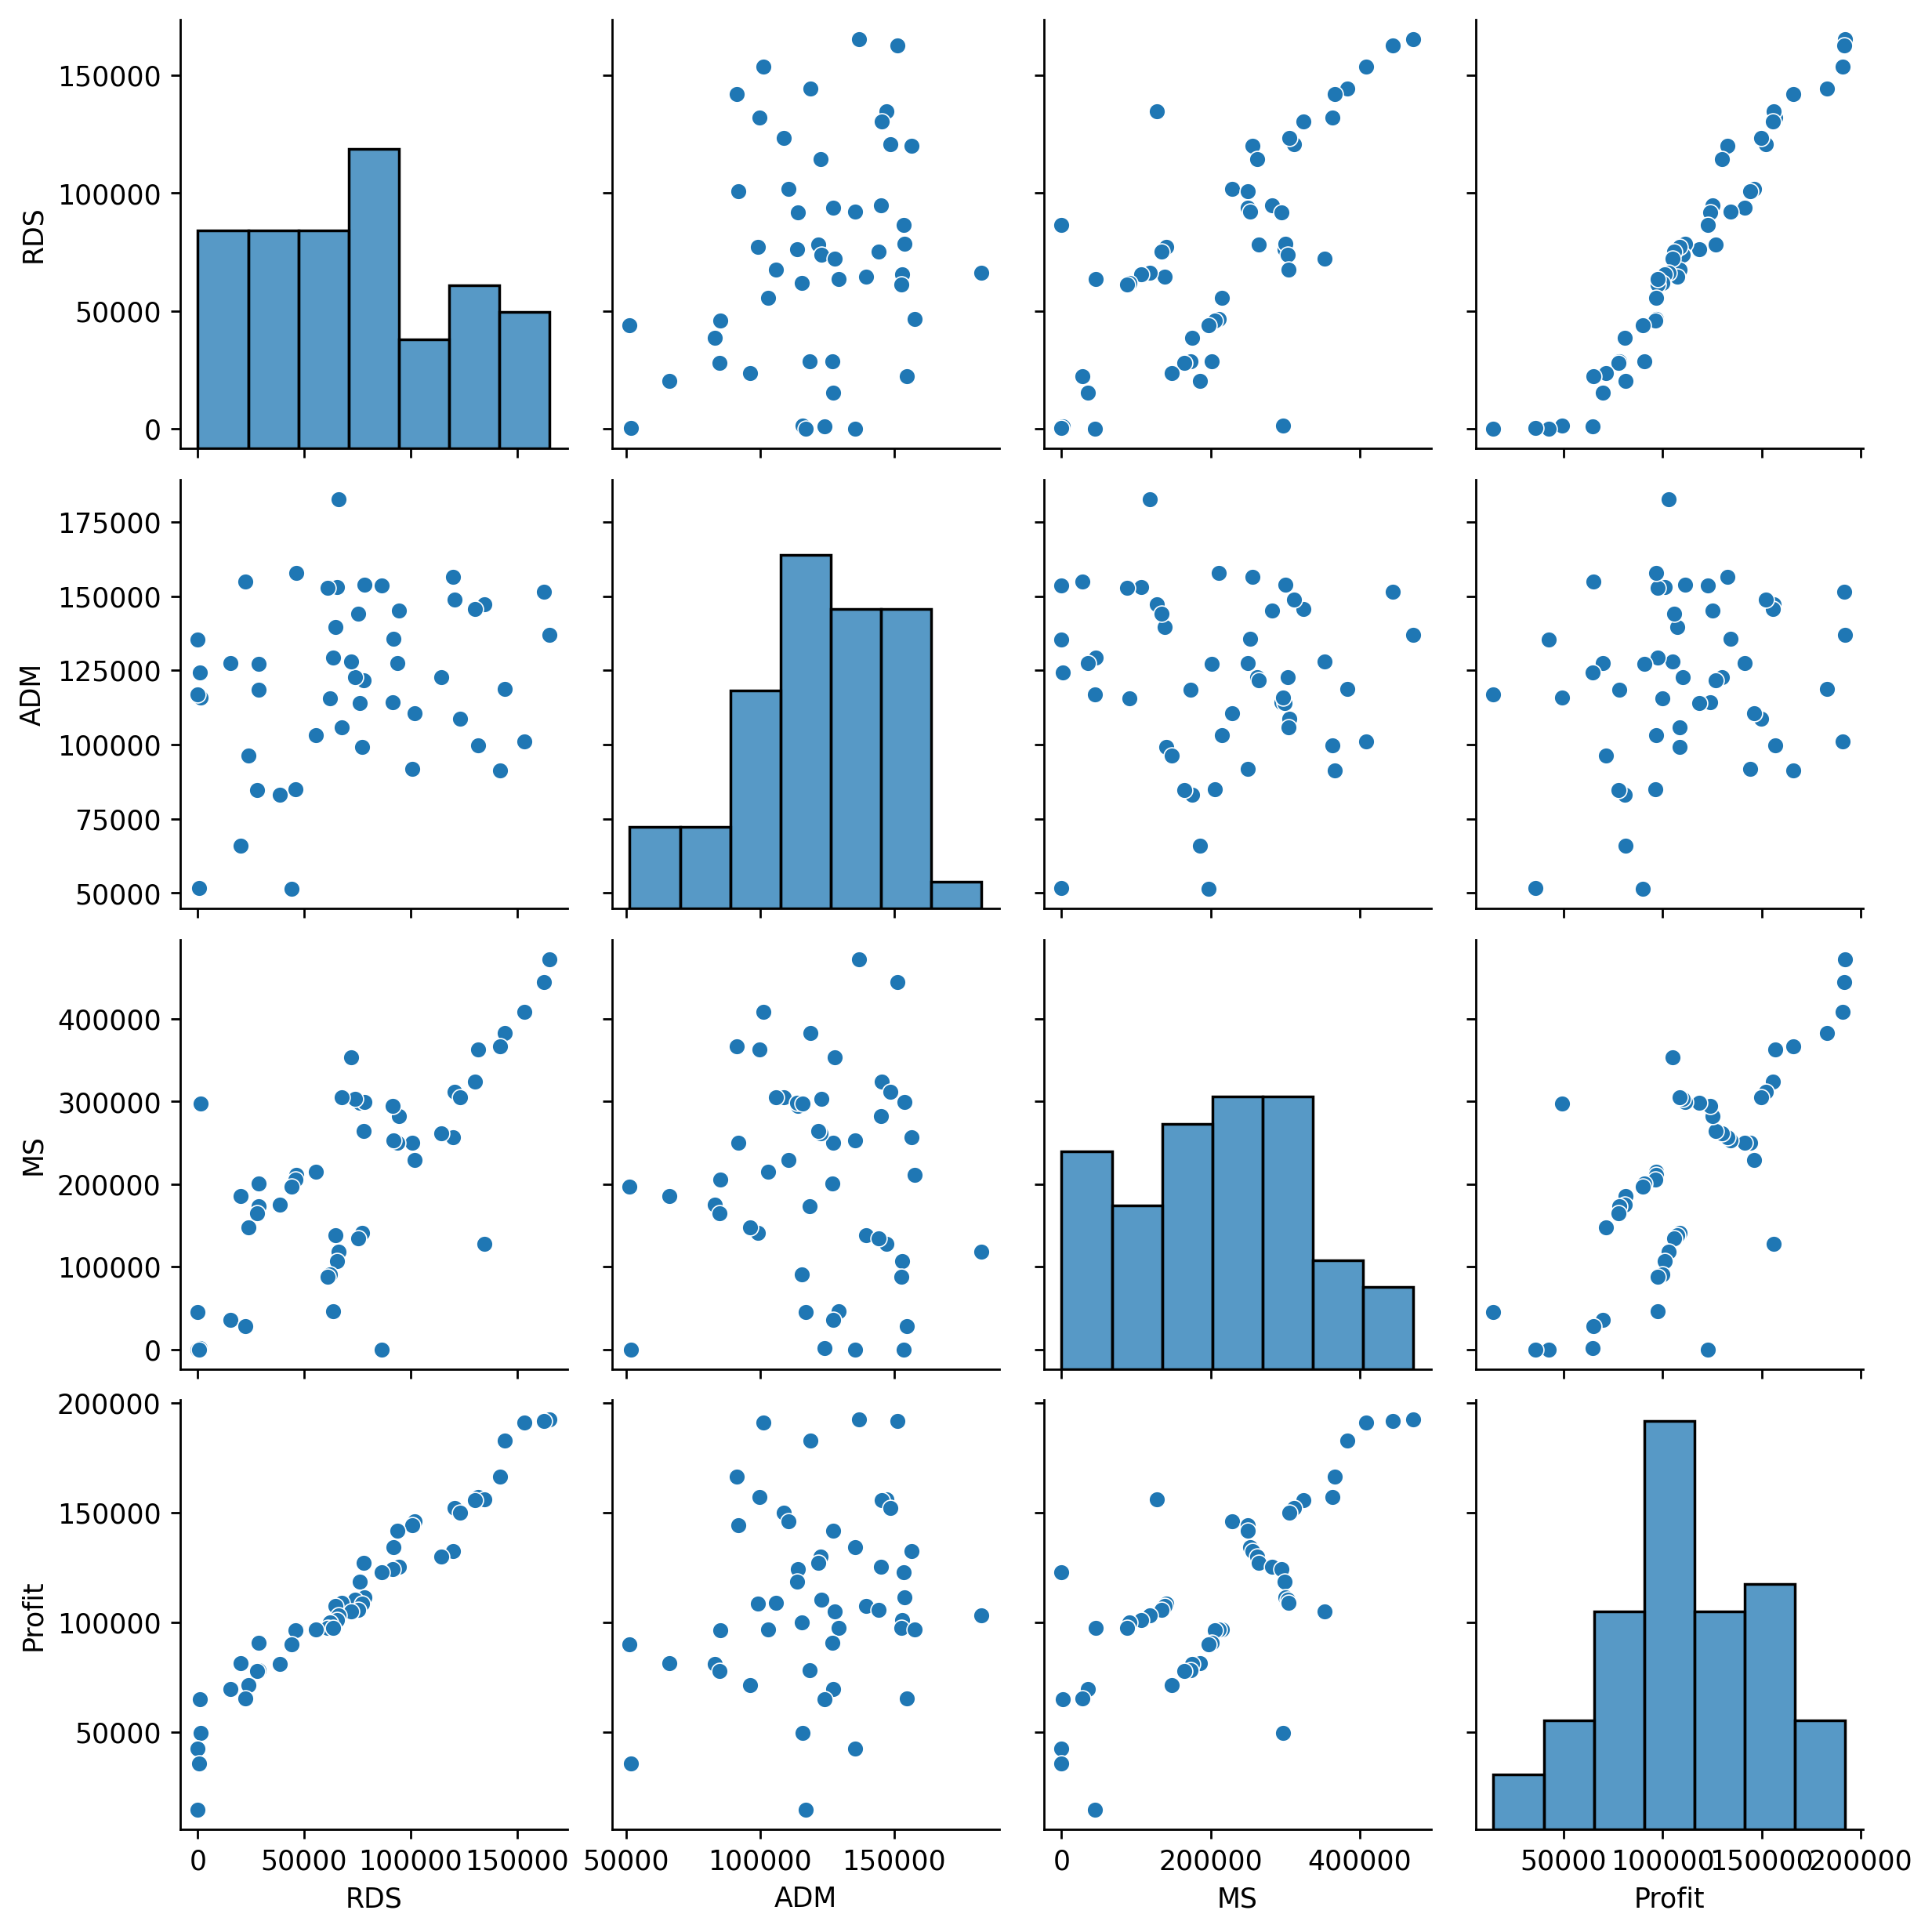

In [7]:
sns.pairplot(df)

In [8]:
df.corr()

,RDS,ADM,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

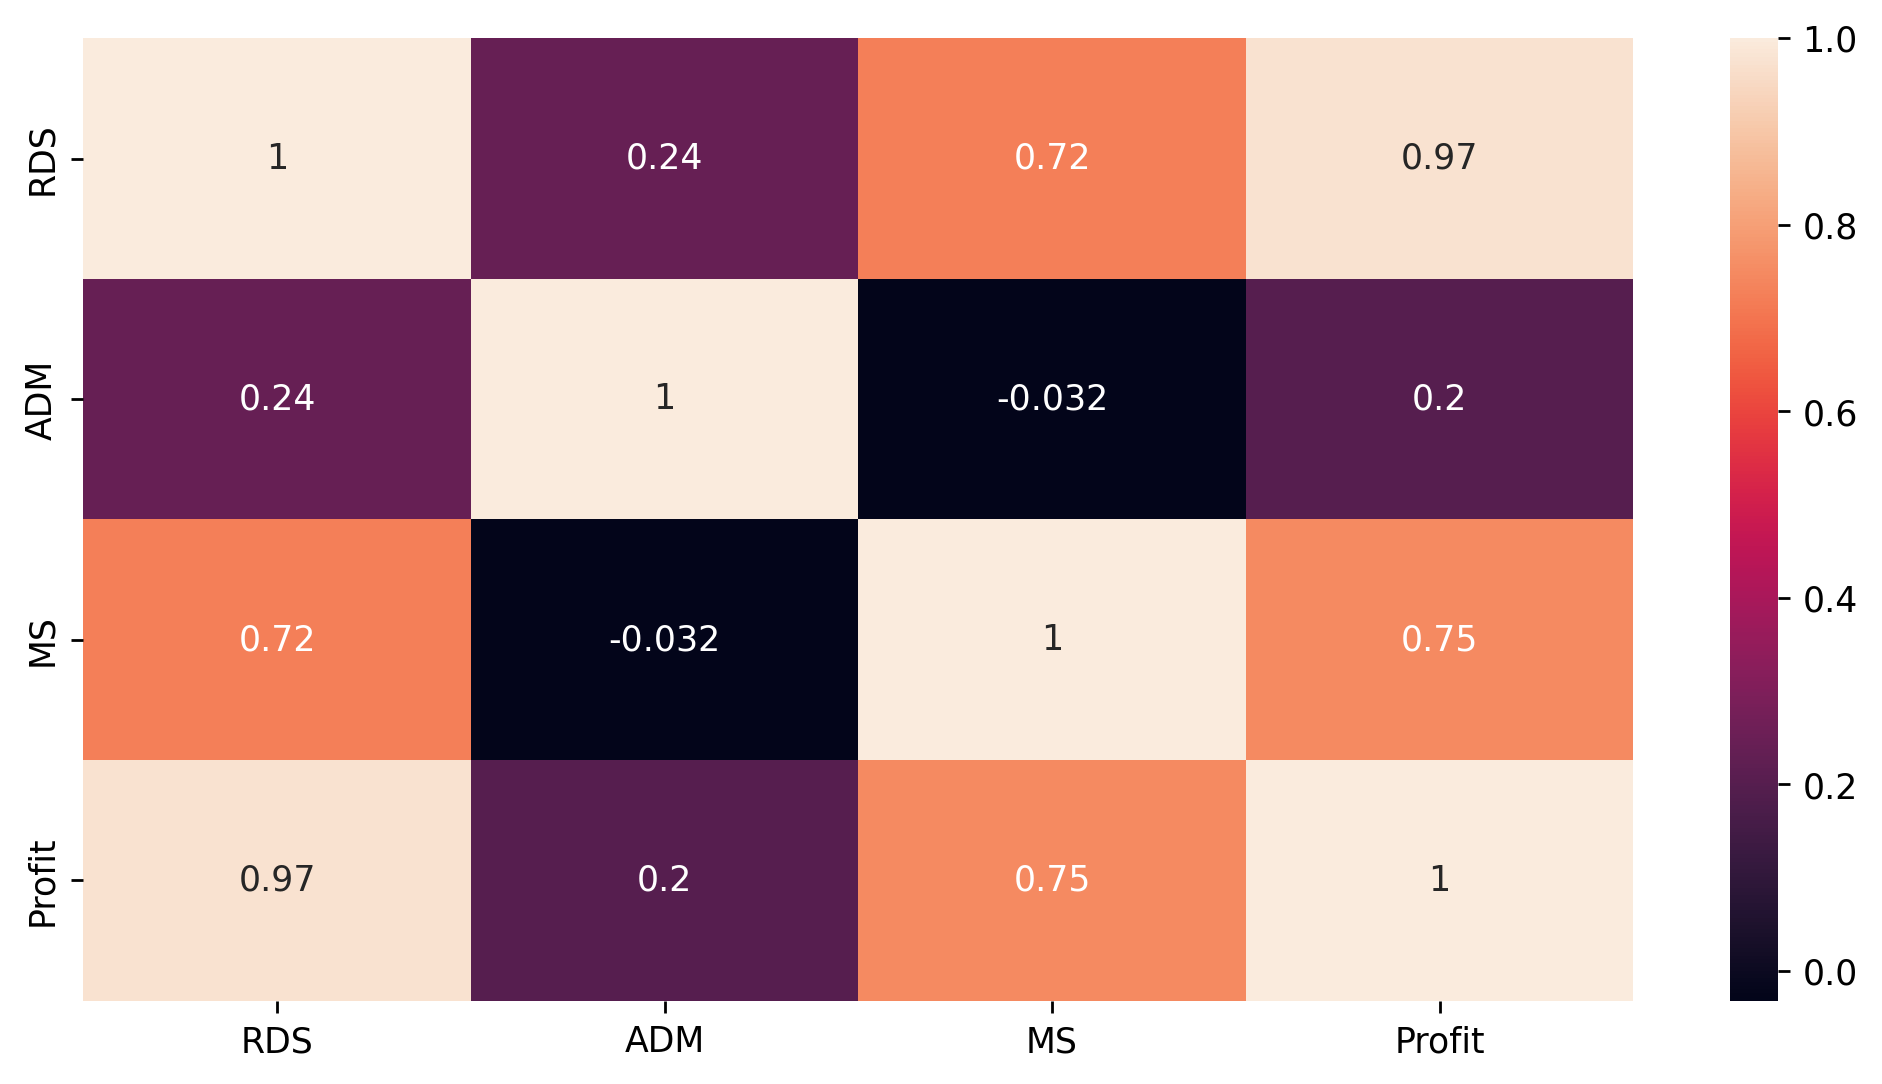

In [9]:
sns.heatmap(df.corr(),annot=True)

In [10]:
## RDS & MS columns are moderatly related

# Model Building

In [11]:
model=smf.ols('Profit~RDS+ADM+MS',data=df).fit()

In [12]:
model.pvalues

Intercept    1.057379e-09
RDS          2.634968e-22
ADM          6.017551e-01
MS           1.047168e-01
dtype: float64

In [13]:
R2=model.rsquared      # Model Accuracy is 95%

In [14]:
R2

0.9507459940683246

# Model Validation Technique

## 1) Collinearity 
## 2) Residual Analysis

In [15]:
rds=smf.ols('Profit~RDS+ADM',data=df).fit()

In [16]:
rds.pvalues

Intercept    5.695336e-12
RDS          2.278348e-31
ADM          2.888932e-01
dtype: float64

In [17]:
ms=smf.ols('Profit~MS+ADM',data=df).fit()

In [18]:
ms.pvalues

Intercept    2.589341e-01
MS           9.727245e-11
ADM          1.729198e-02
dtype: float64

In [19]:
## Calculation of VIF    
## VIF=1/1-r^2

RDS=smf.ols('RDS~ADM+MS',data=df).fit()
RDSr=RDS.rsquared 
ADM=smf.ols('ADM~RDS+MS',data=df).fit()
ADMr=ADM.rsquared
MS=smf.ols('MS~RDS+ADM',data=df).fit()
MSr=MS.rsquared


In [20]:
vif_r=1/(1-RDSr)
vif_r

2.4689030699947017

In [21]:
vif_a=1/(1-ADMr)
vif_a

1.1750910070550453

In [22]:
vif_m=1/(1-MSr)
vif_a

1.1750910070550453

In [23]:
VIF=pd.DataFrame({'RDS':[vif_r],'ADM':[vif_a],'MS':[vif_m]})

In [24]:
VIF

,RDS,ADM,MS
0,2.468903,1.175091,2.326773


In [25]:
## None of these values is > 20 so we can't decide to drop any column

In [26]:
## Residual anlysis

import statsmodels.api as sm

In [27]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

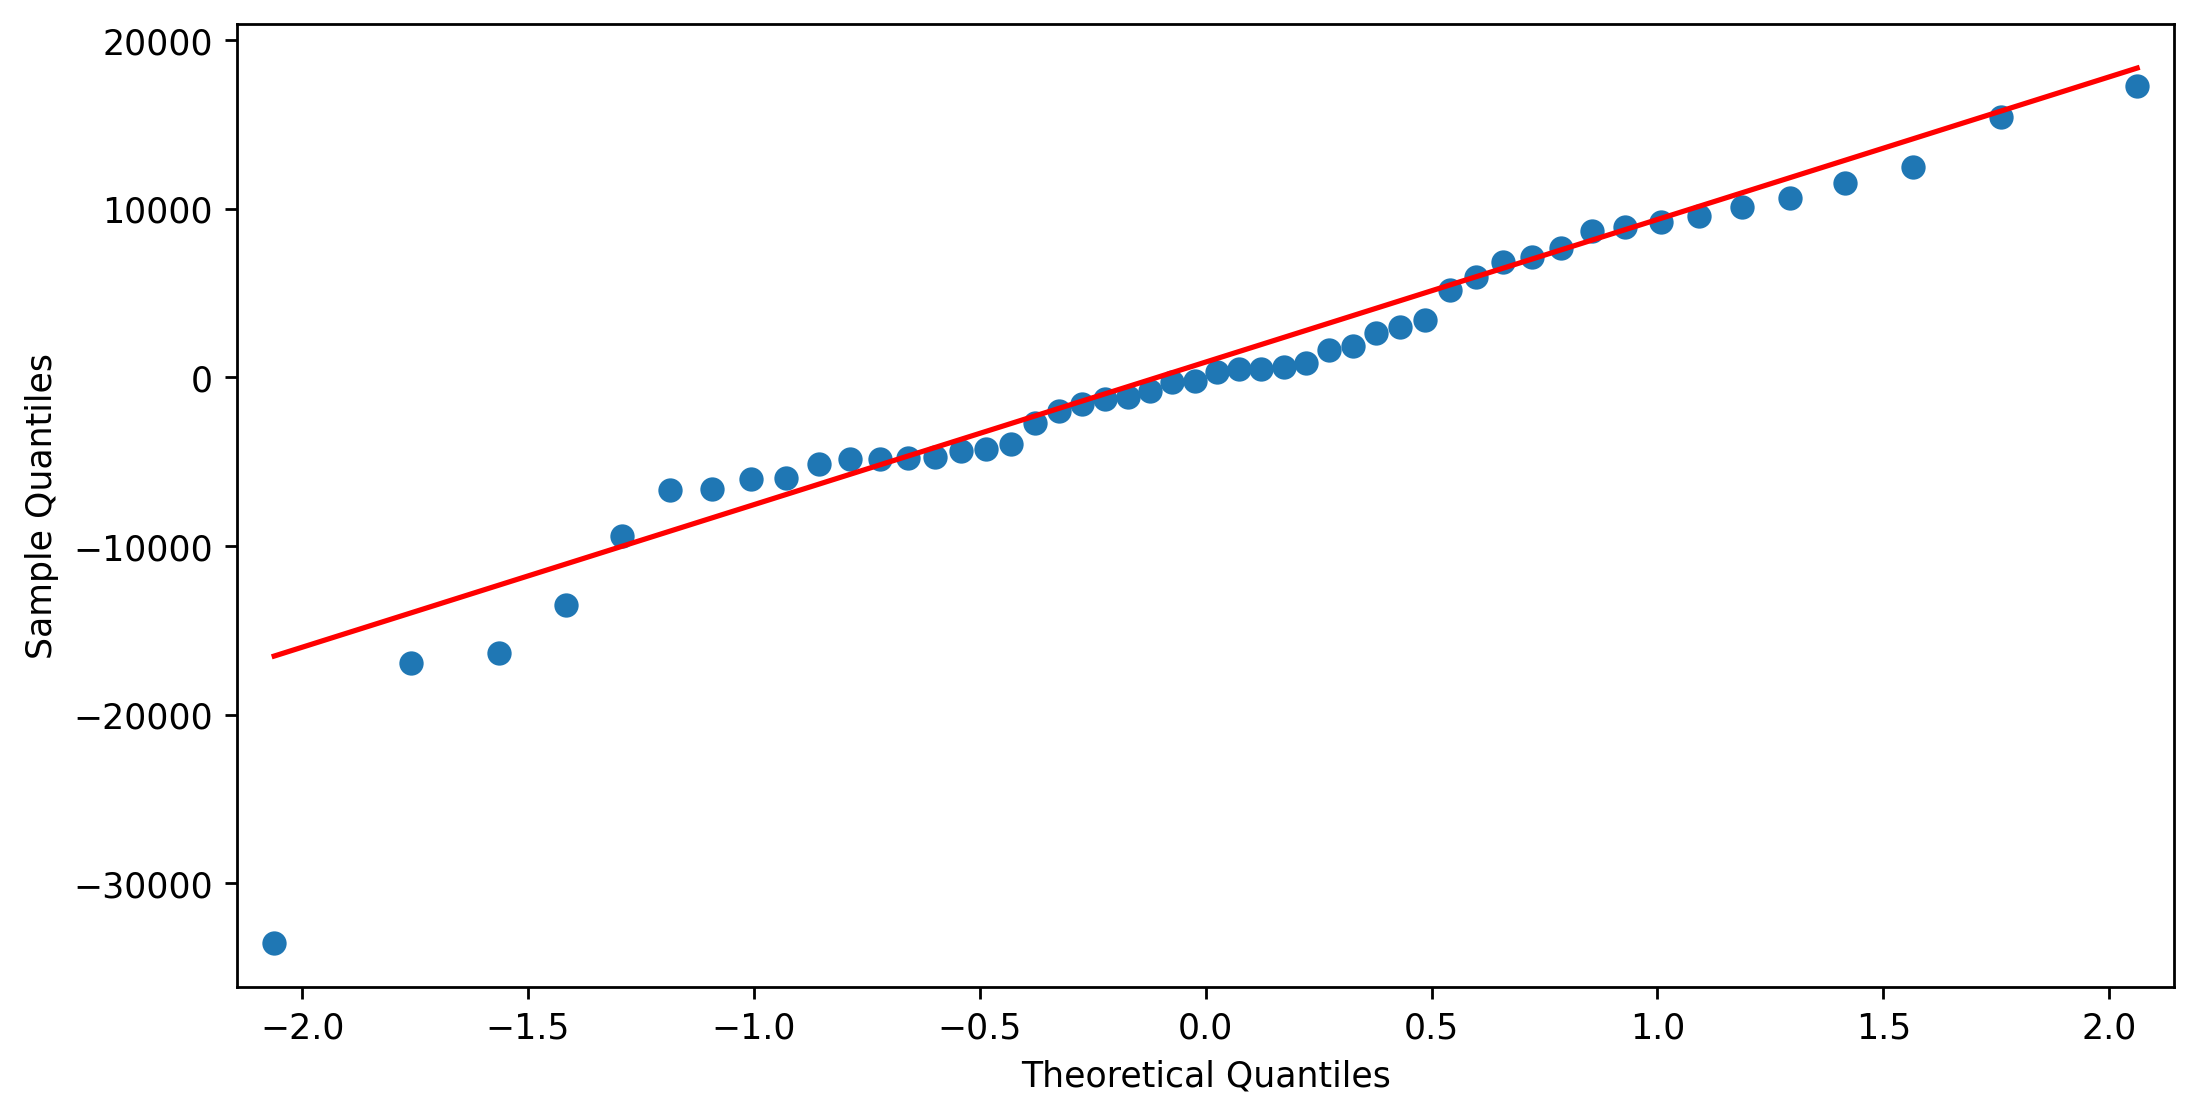

In [57]:
sm.qqplot(model.resid,line='q');

In [29]:
np.where(model.resid<-30000)

(array([49], dtype=int64),)

In [30]:
# Looking at qq plot we can say that errors are not following under normal distribution

eval_env: 1


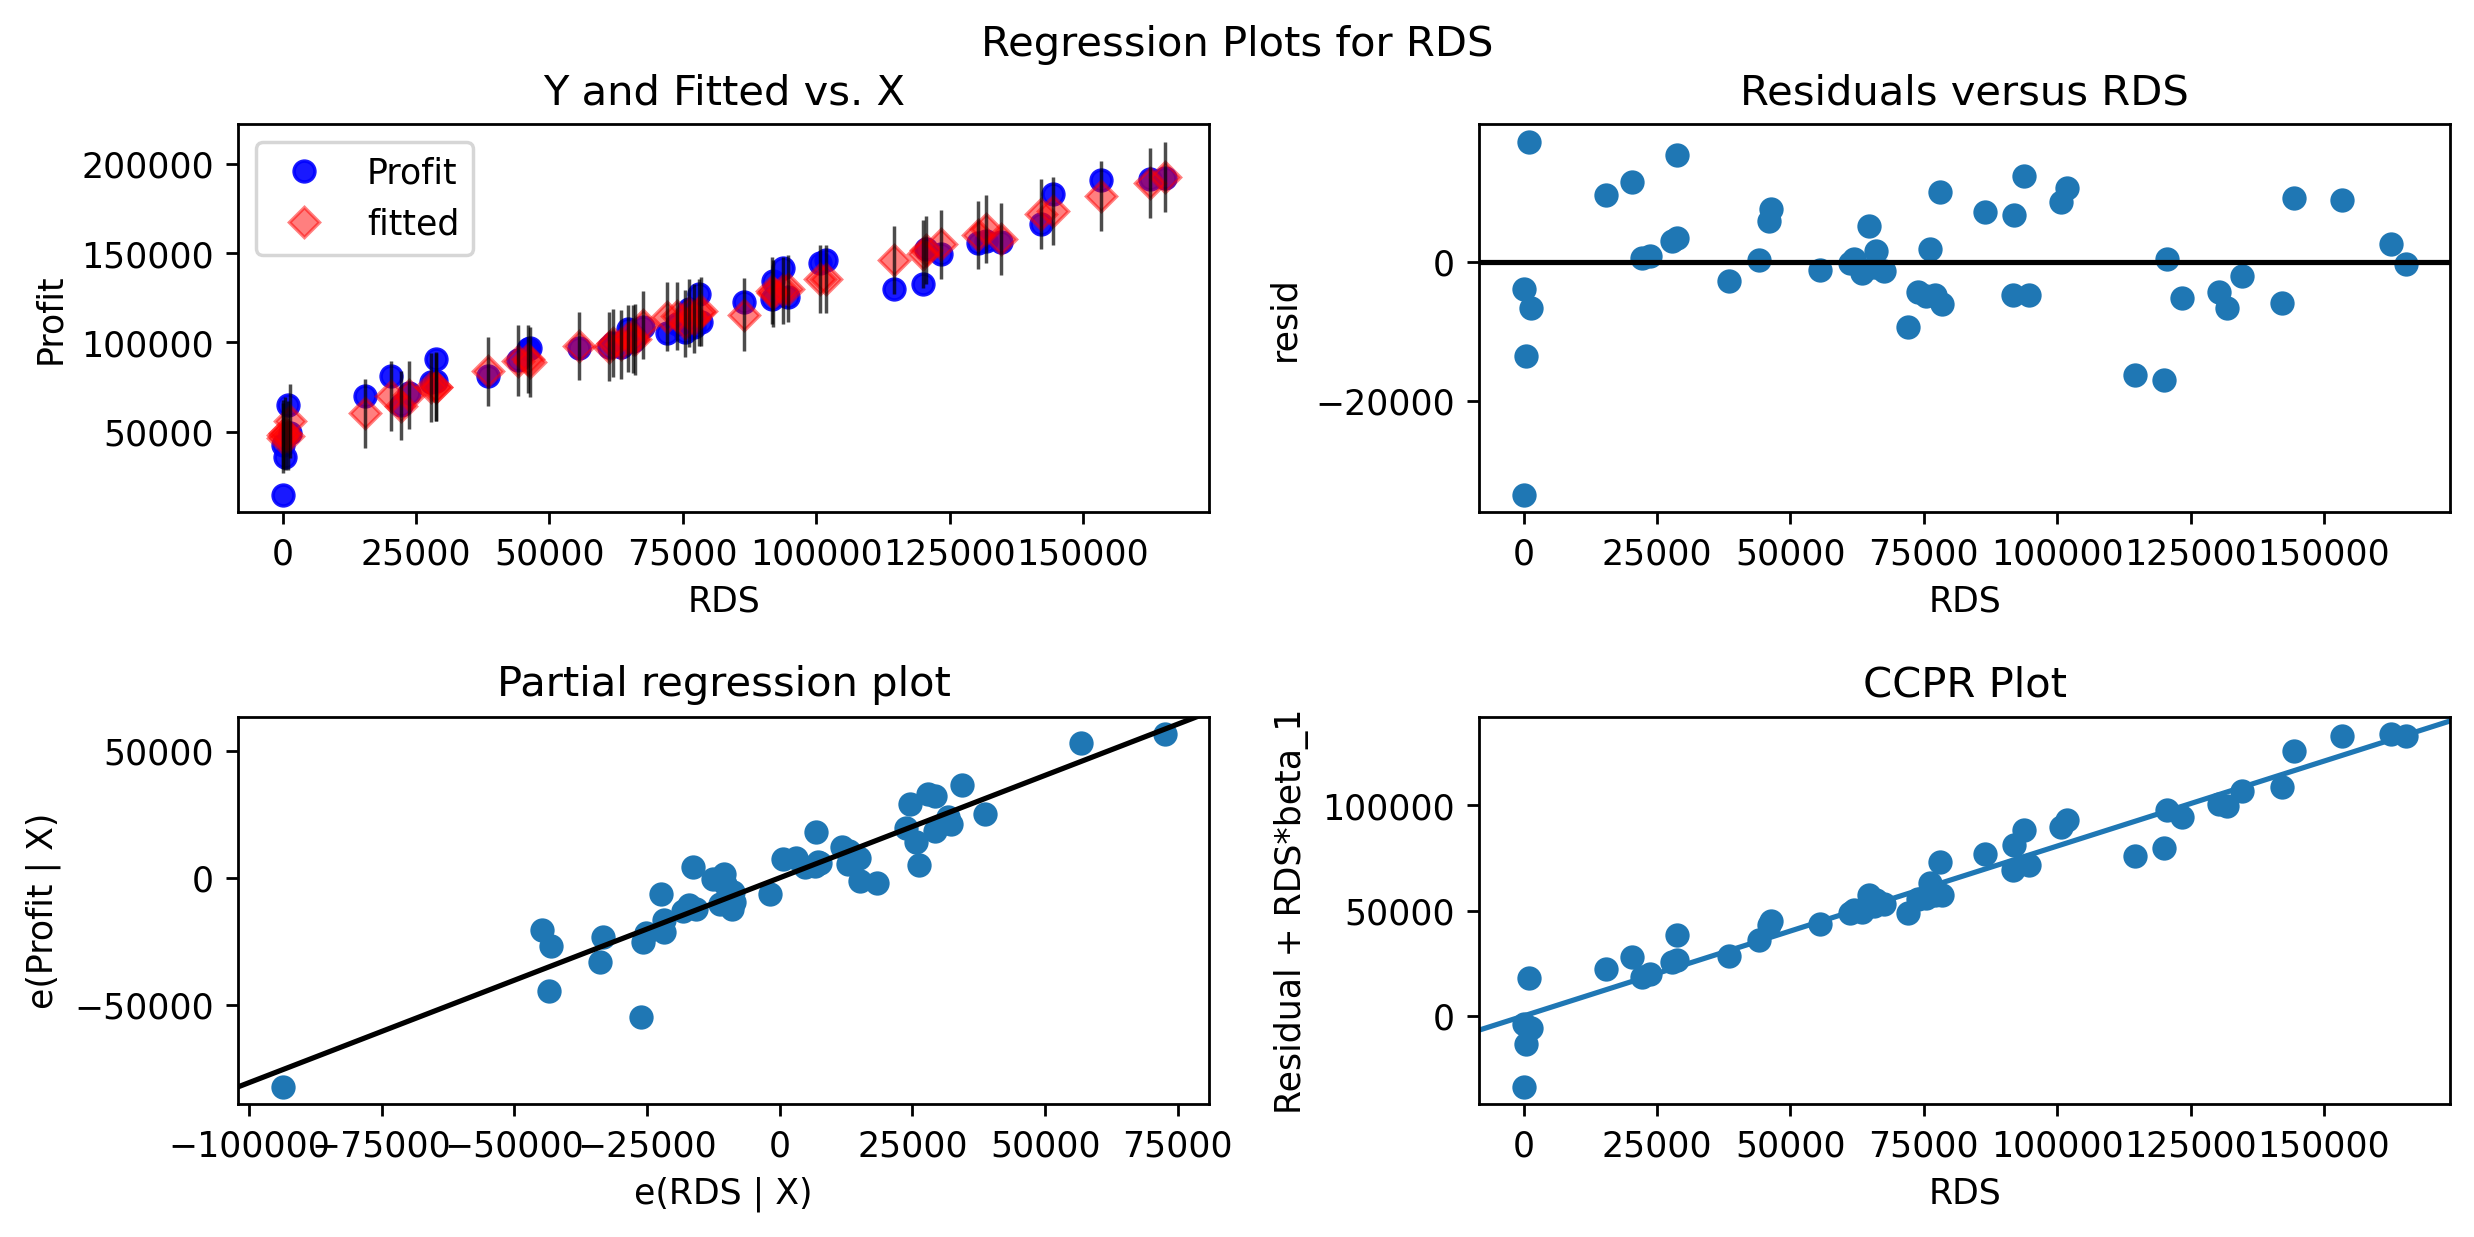

In [59]:
sm.graphics.plot_regress_exog(model,'RDS');

eval_env: 1


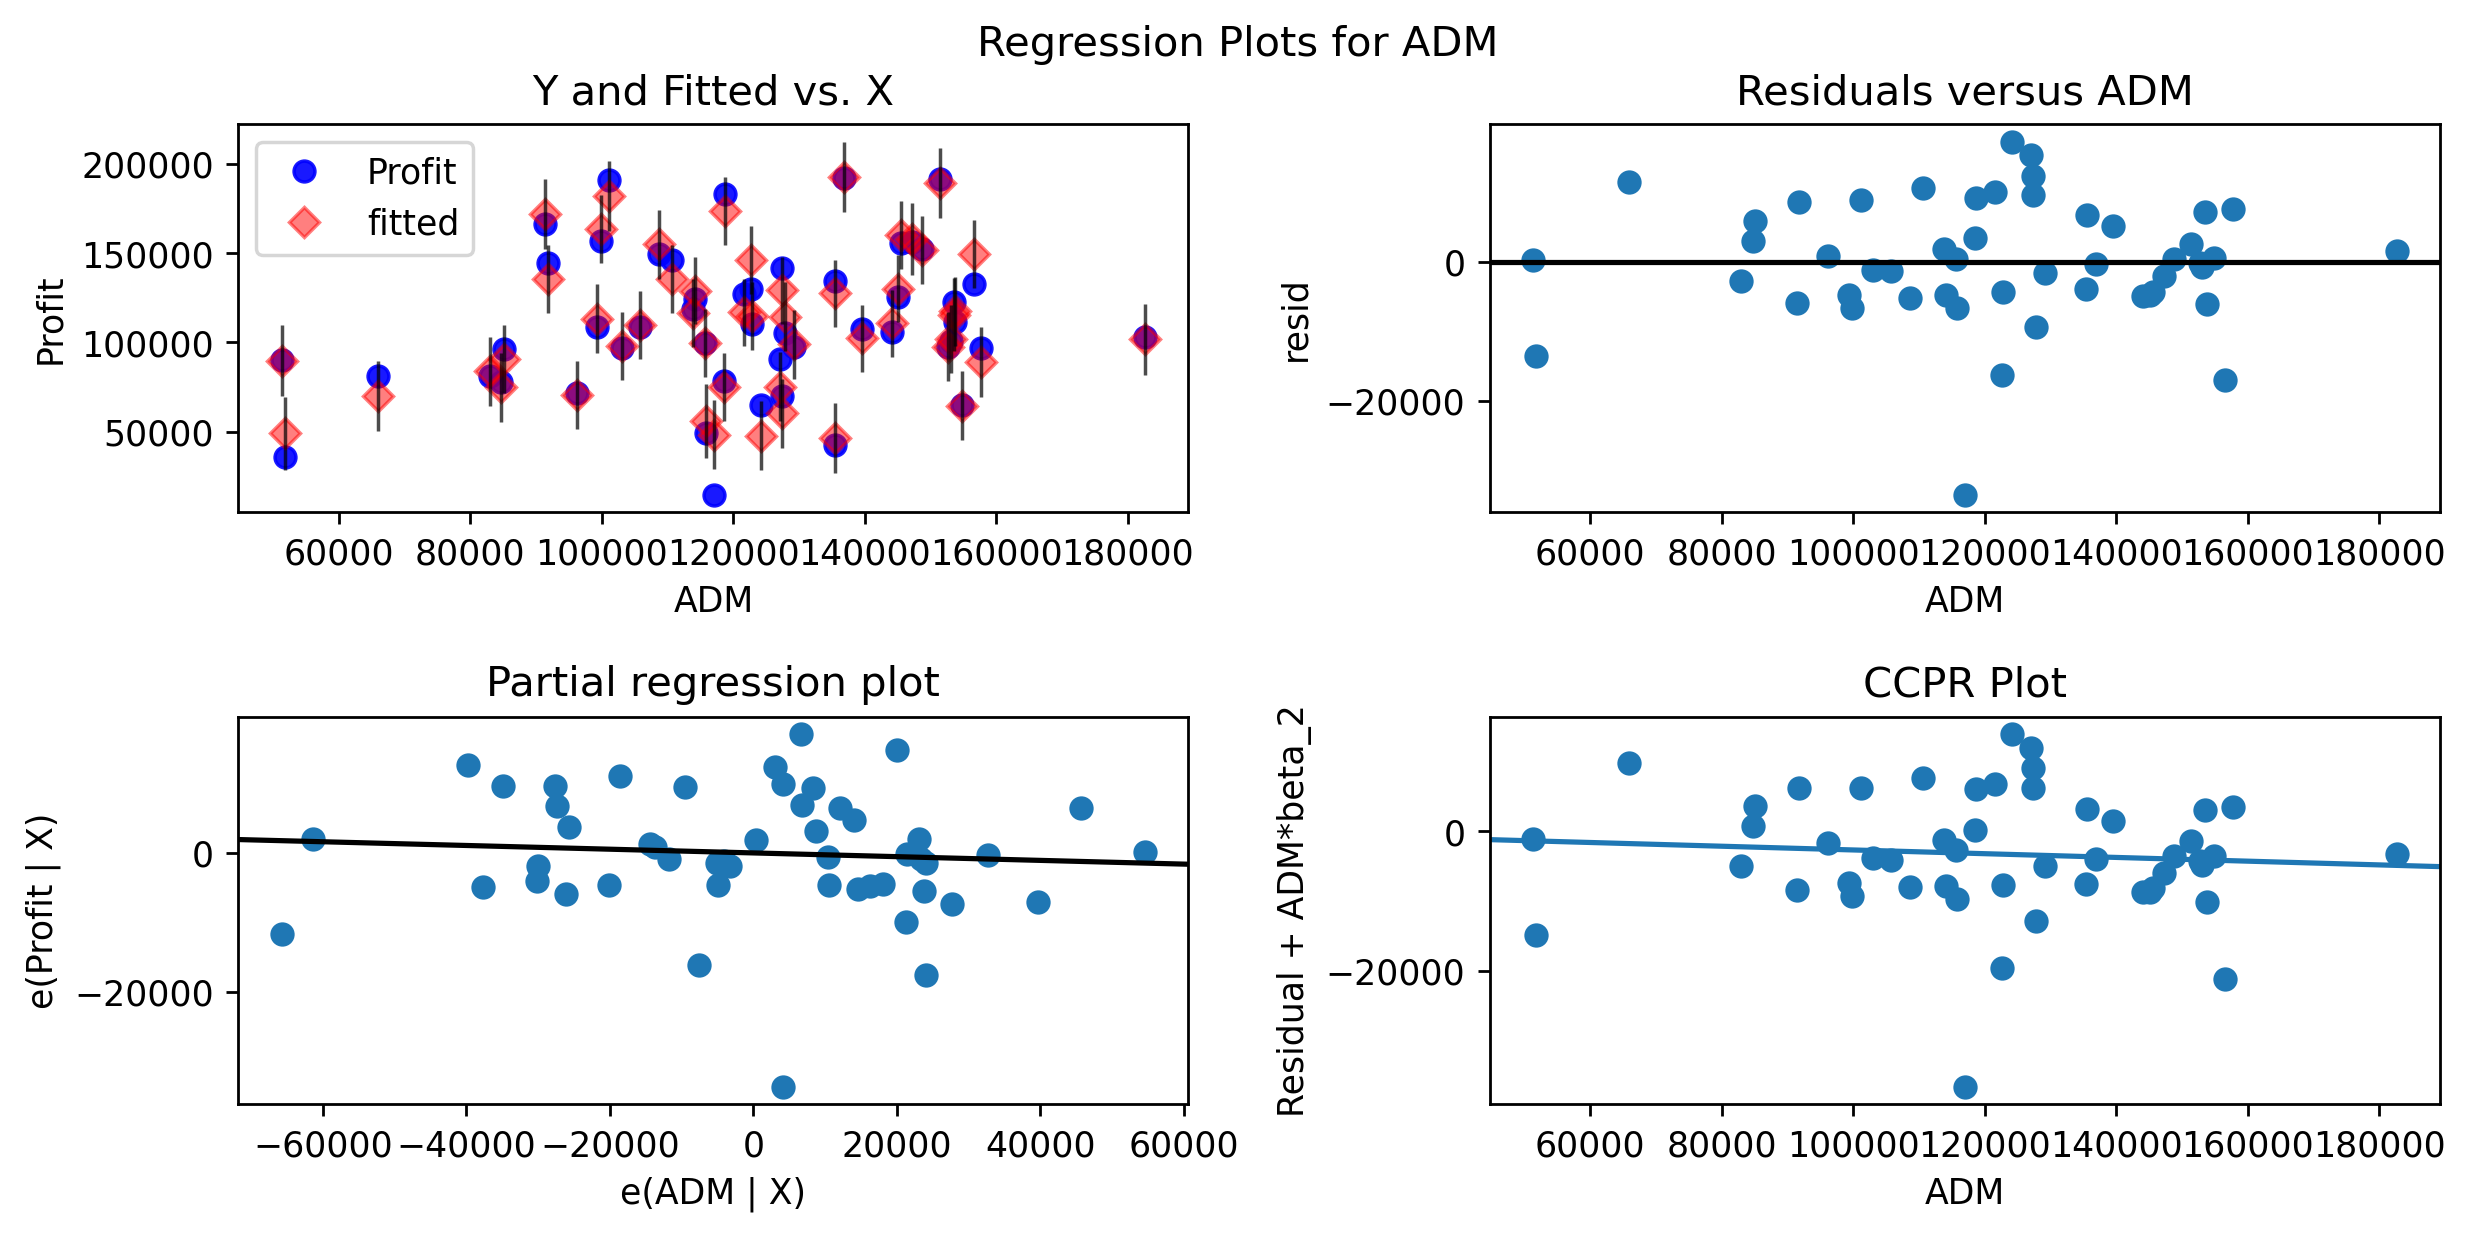

In [58]:
sm.graphics.plot_regress_exog(model,'ADM');

eval_env: 1


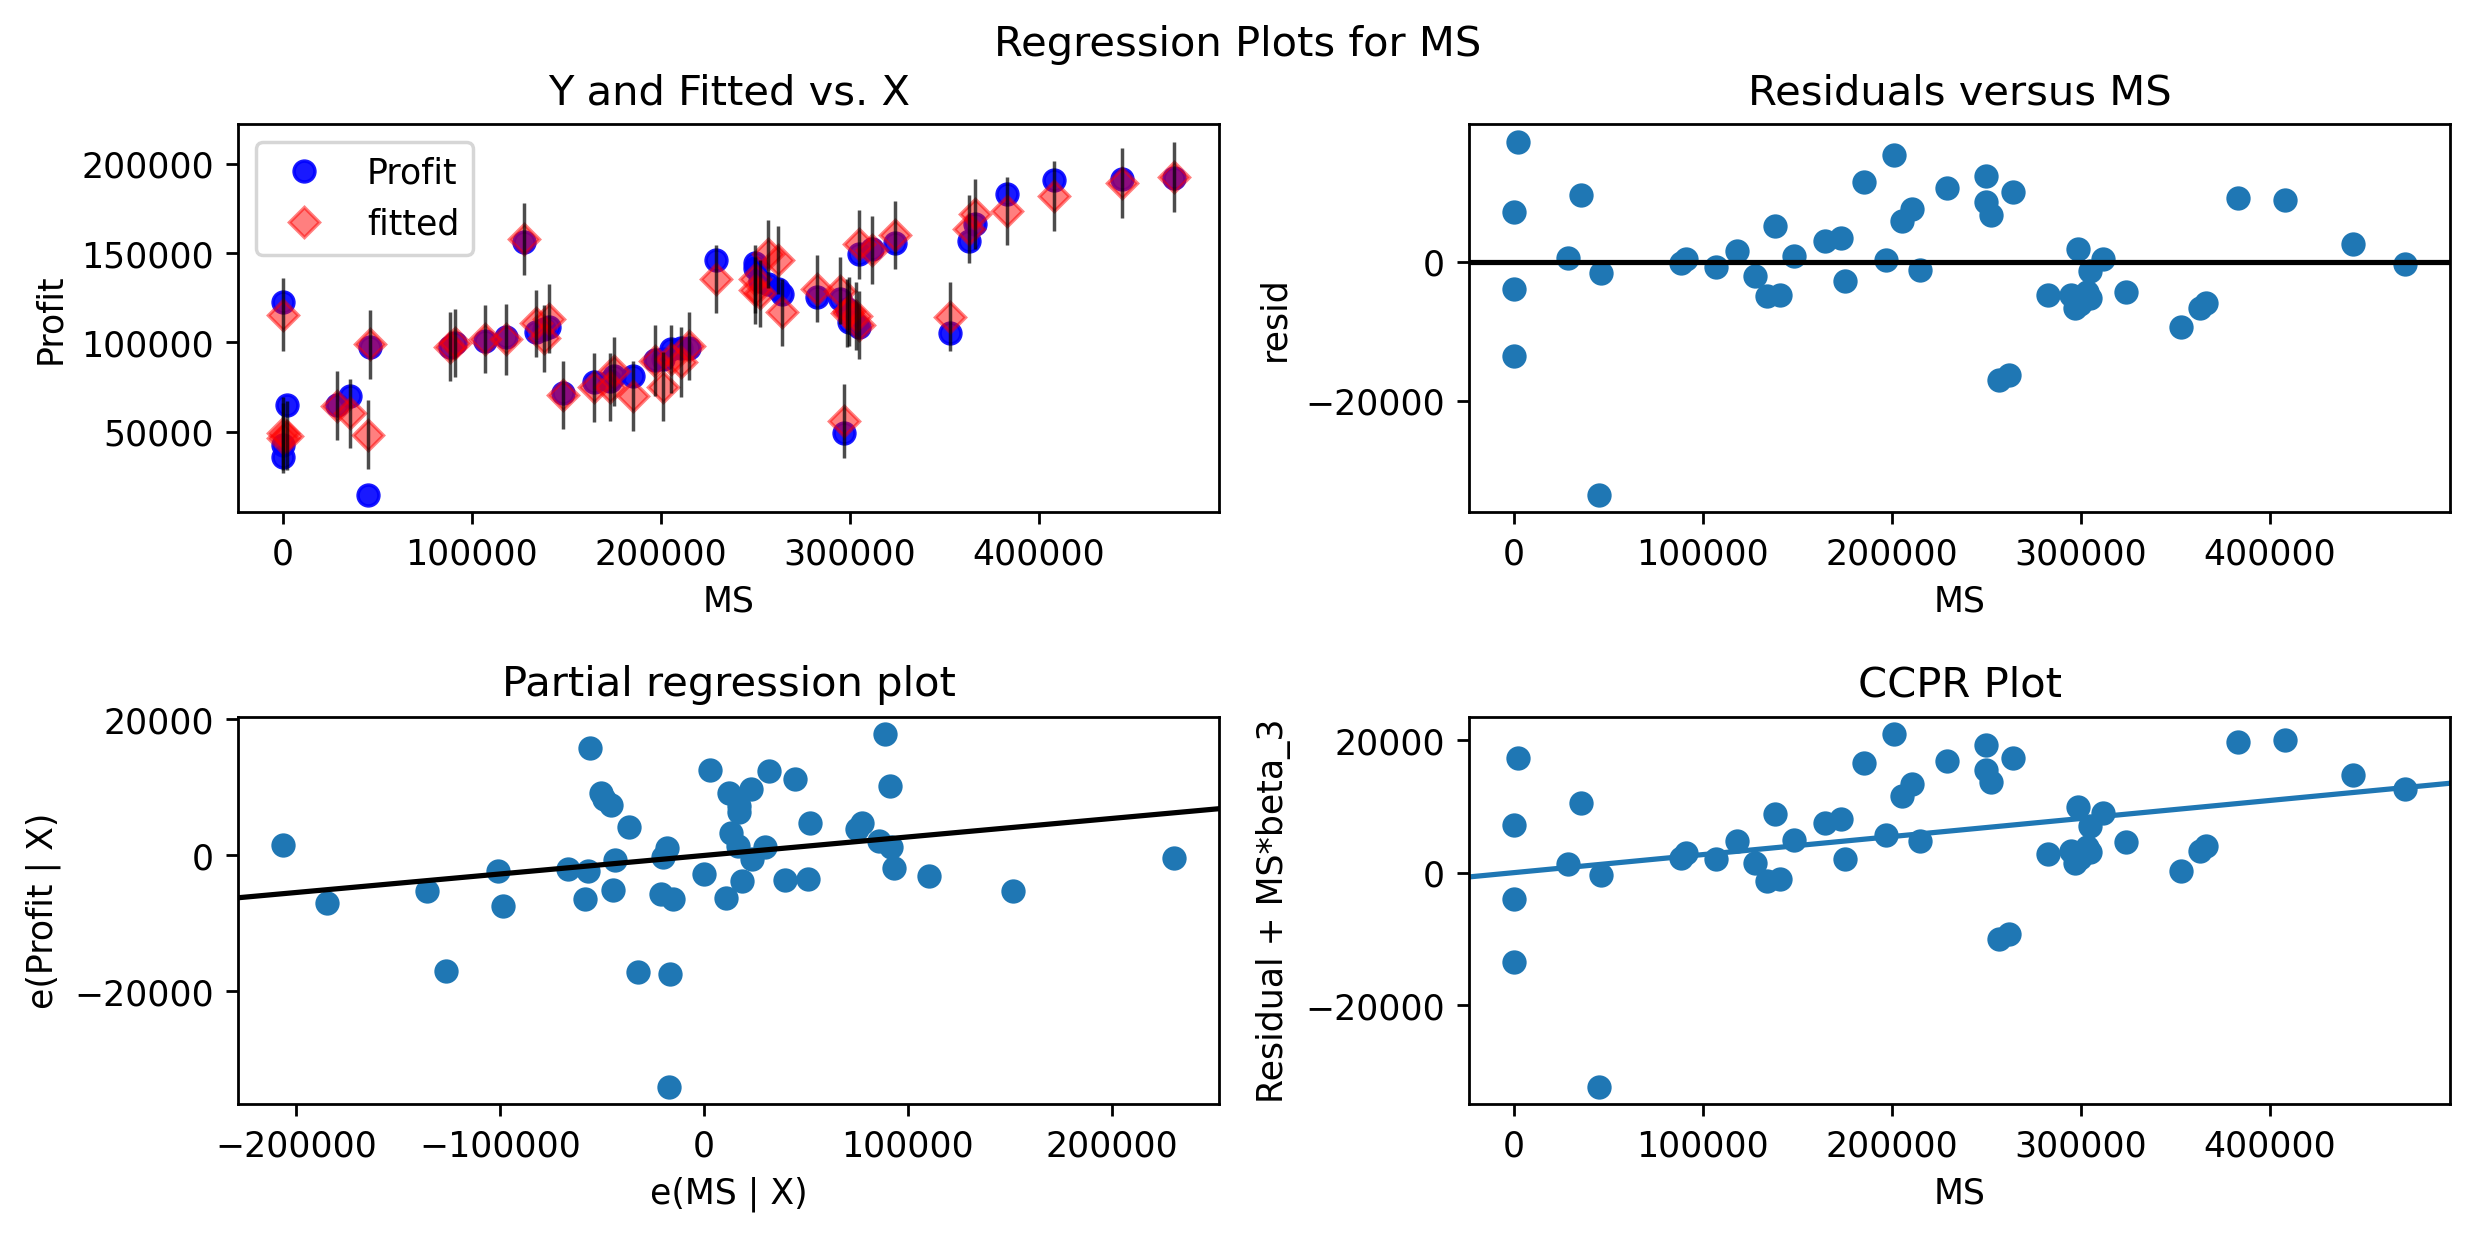

In [60]:
sm.graphics.plot_regress_exog(model,'MS');

#  Model deletion Technique
## Cook's distance


In [34]:
inf=model.get_influence()


In [35]:
c,p=inf.cooks_distance

In [36]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

<StemContainer object of 3 artists>

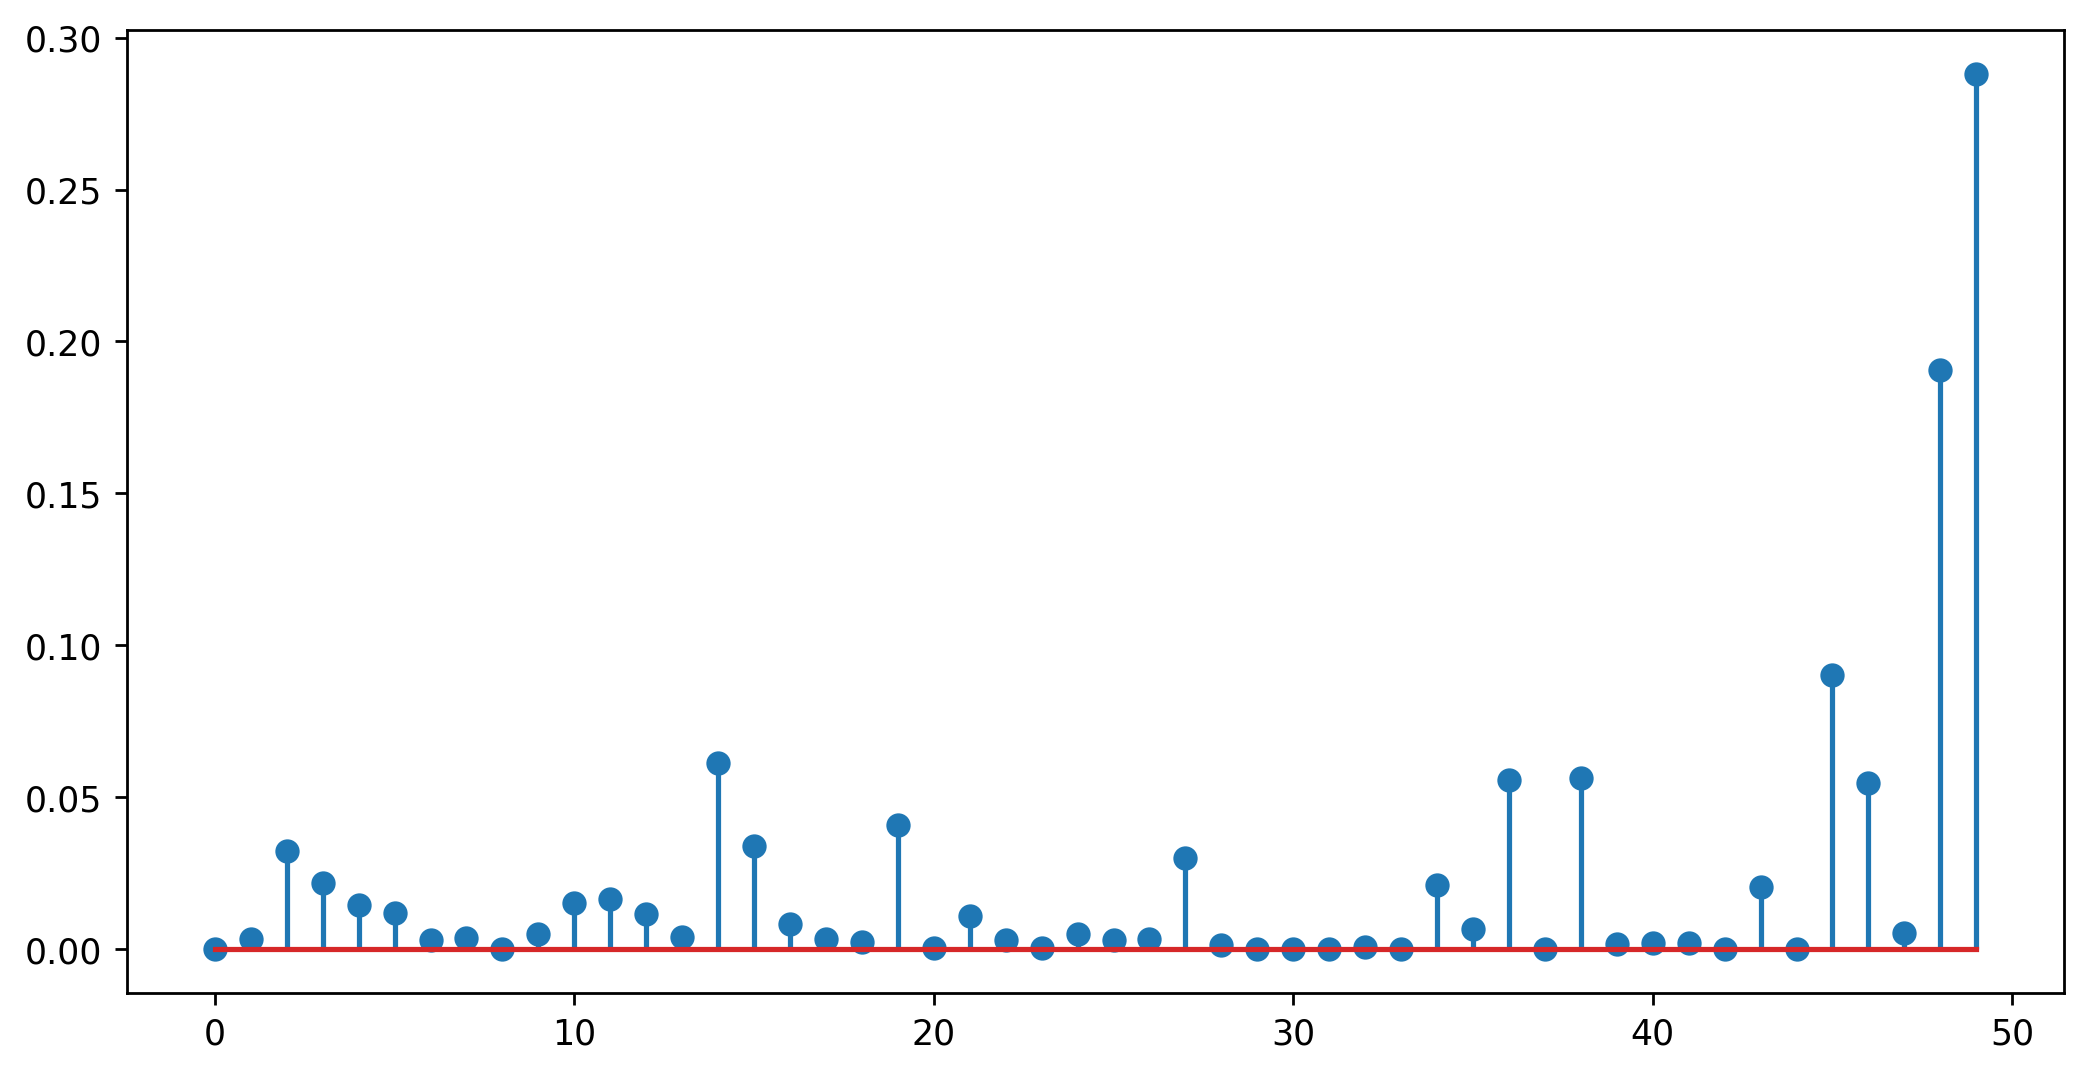

In [37]:
## Cooks distance plot
plt.stem(c)


In [38]:
np.argmax(c) , np.max(c)

(49, 0.2880822927543264)

In [39]:
# influence plot
from statsmodels.graphics.regressionplots import influence_plot

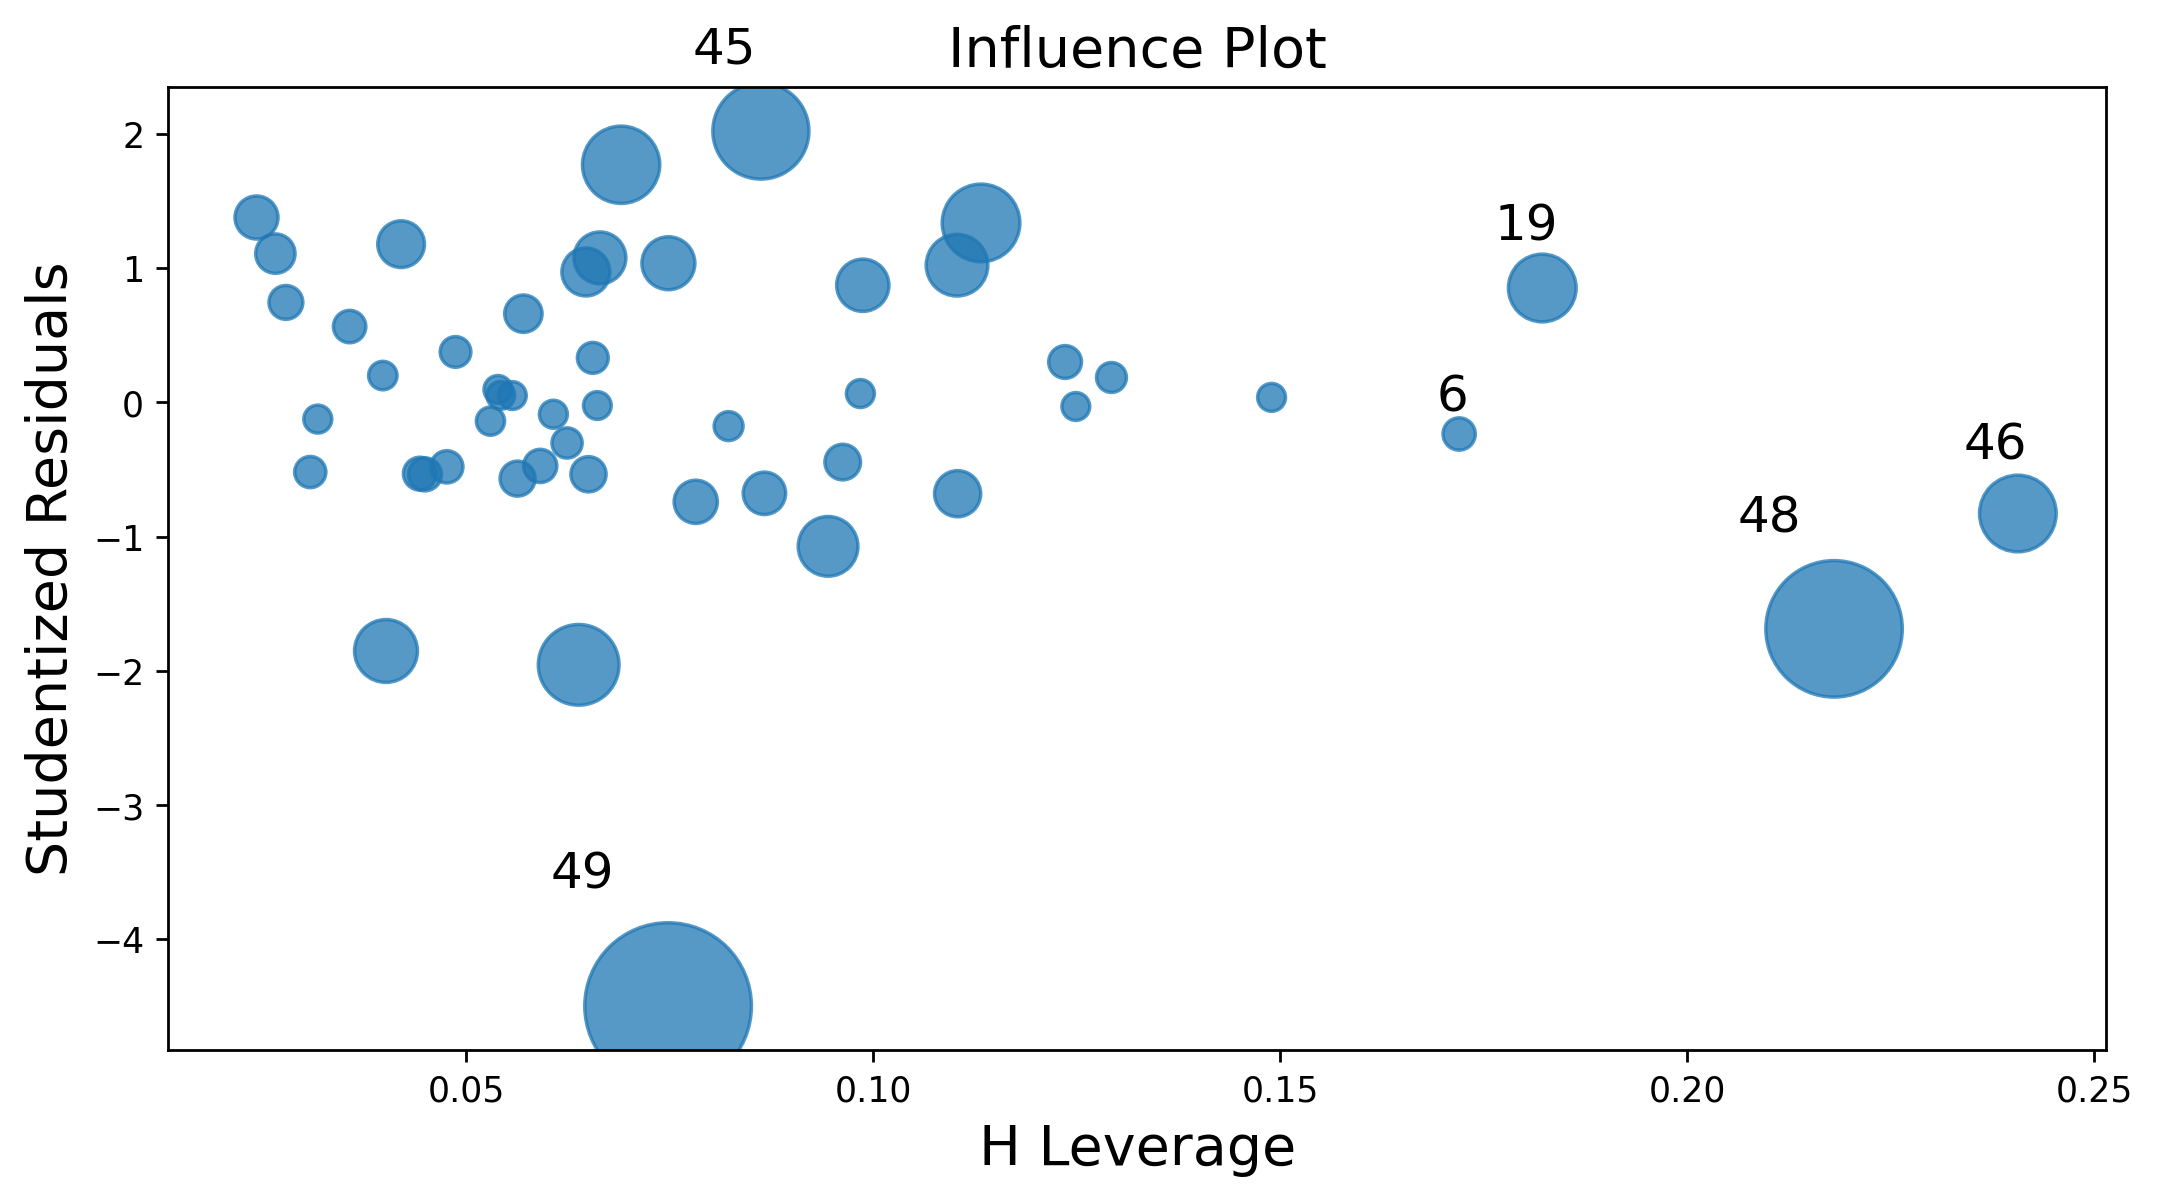

In [40]:
influence_plot(model);

In [41]:
# Calculation of cut off
k=len(df.columns)
n=len(df)
leverage_cutoff=3*(k+1)/n
leverage_cutoff

0.36

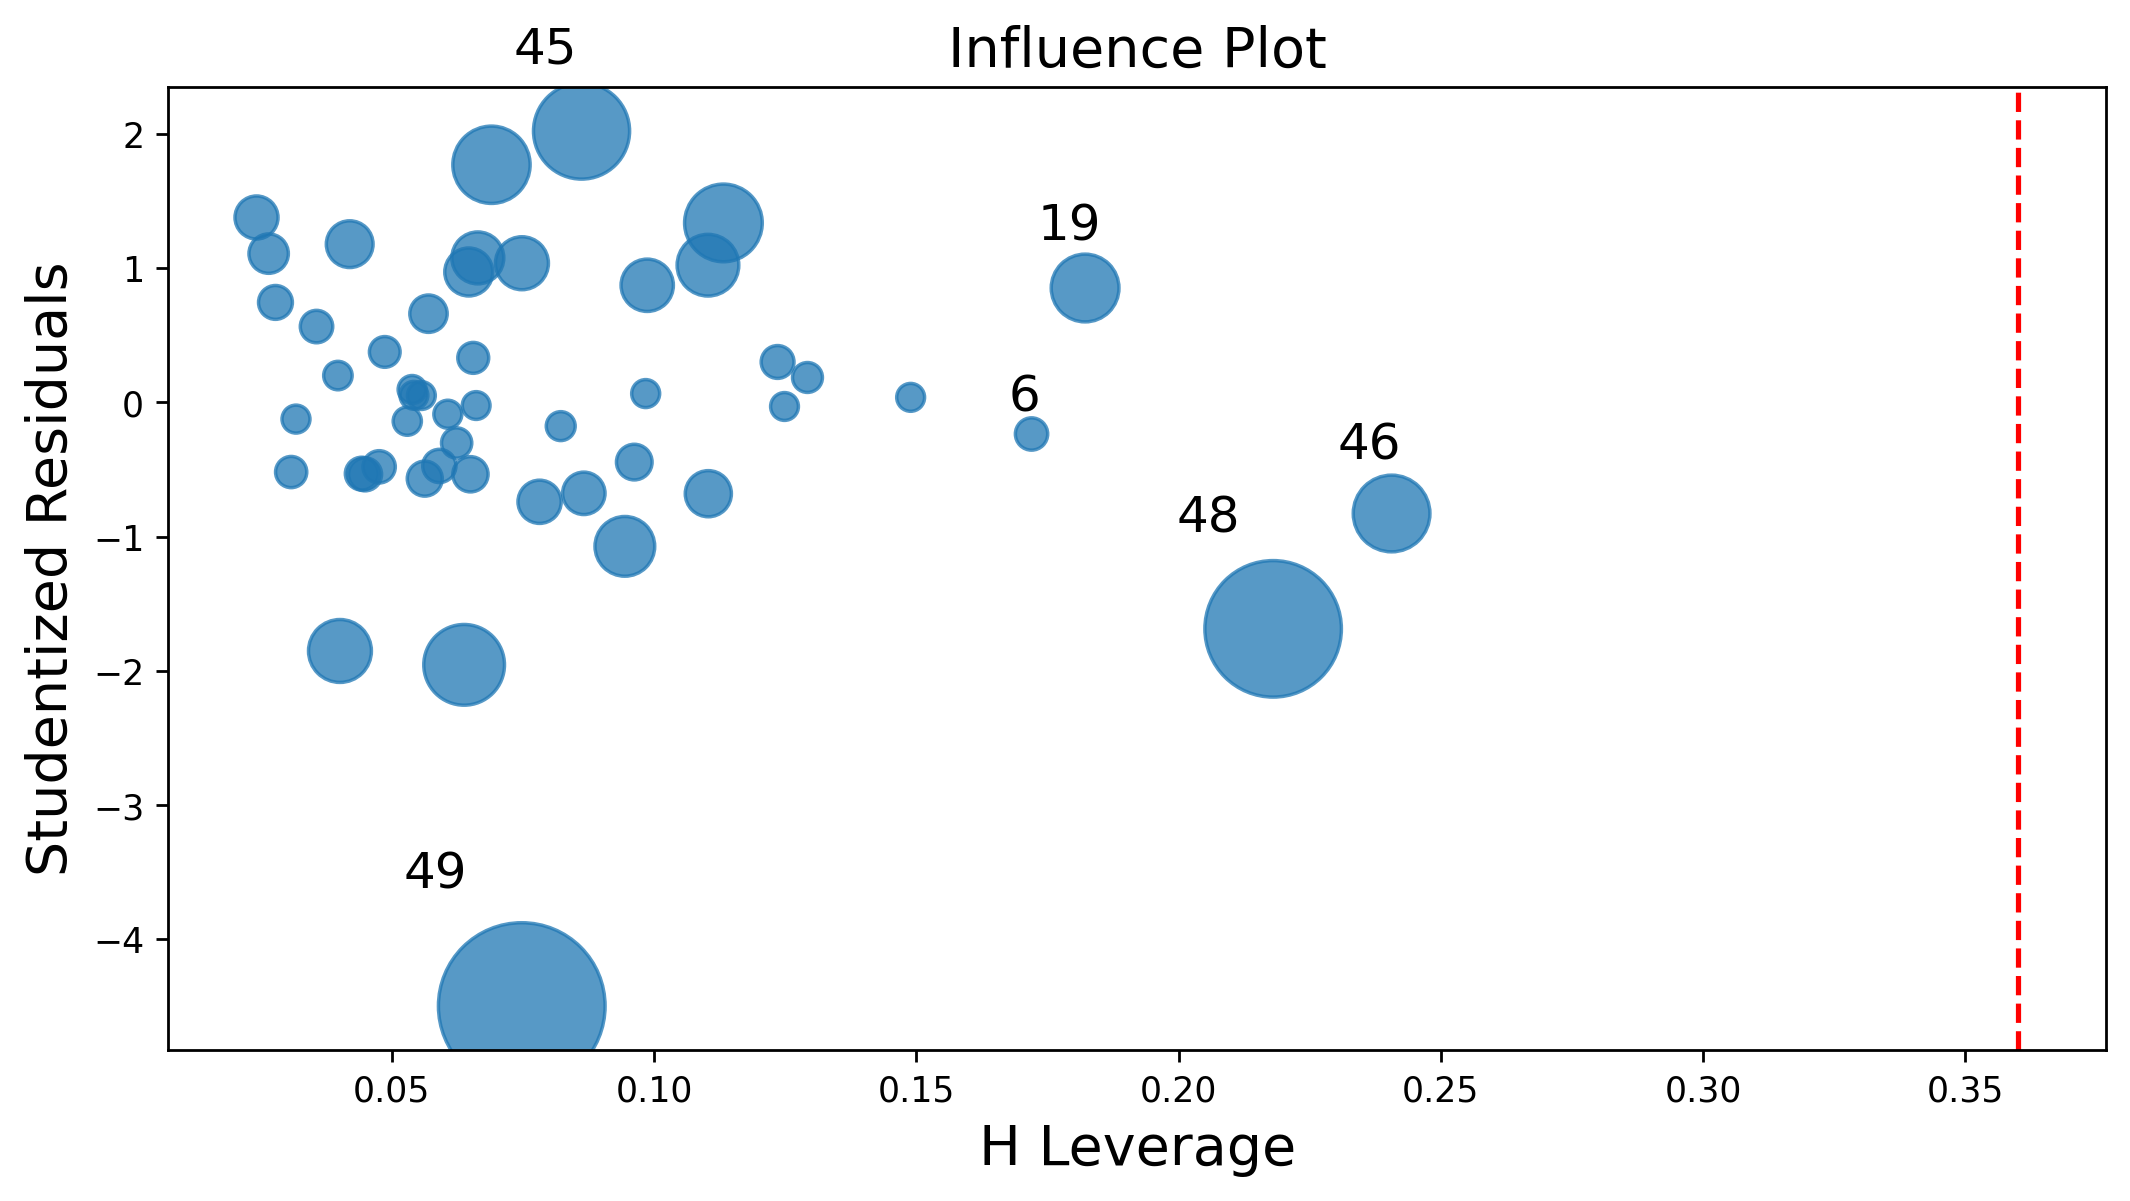

In [42]:
influence_plot(model)
plt.axvline(leverage_cutoff,color='red',linestyle='--')


# Improving The Model¶

In [43]:
df.drop([49],inplace=True)

In [44]:
df

,RDS,ADM,MS,ST,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [45]:
final_model=smf.ols('Profit~RDS+ADM+MS',data=df).fit()

In [46]:
inf=model.get_influence()
c,p=inf.cooks_distance

<StemContainer object of 3 artists>

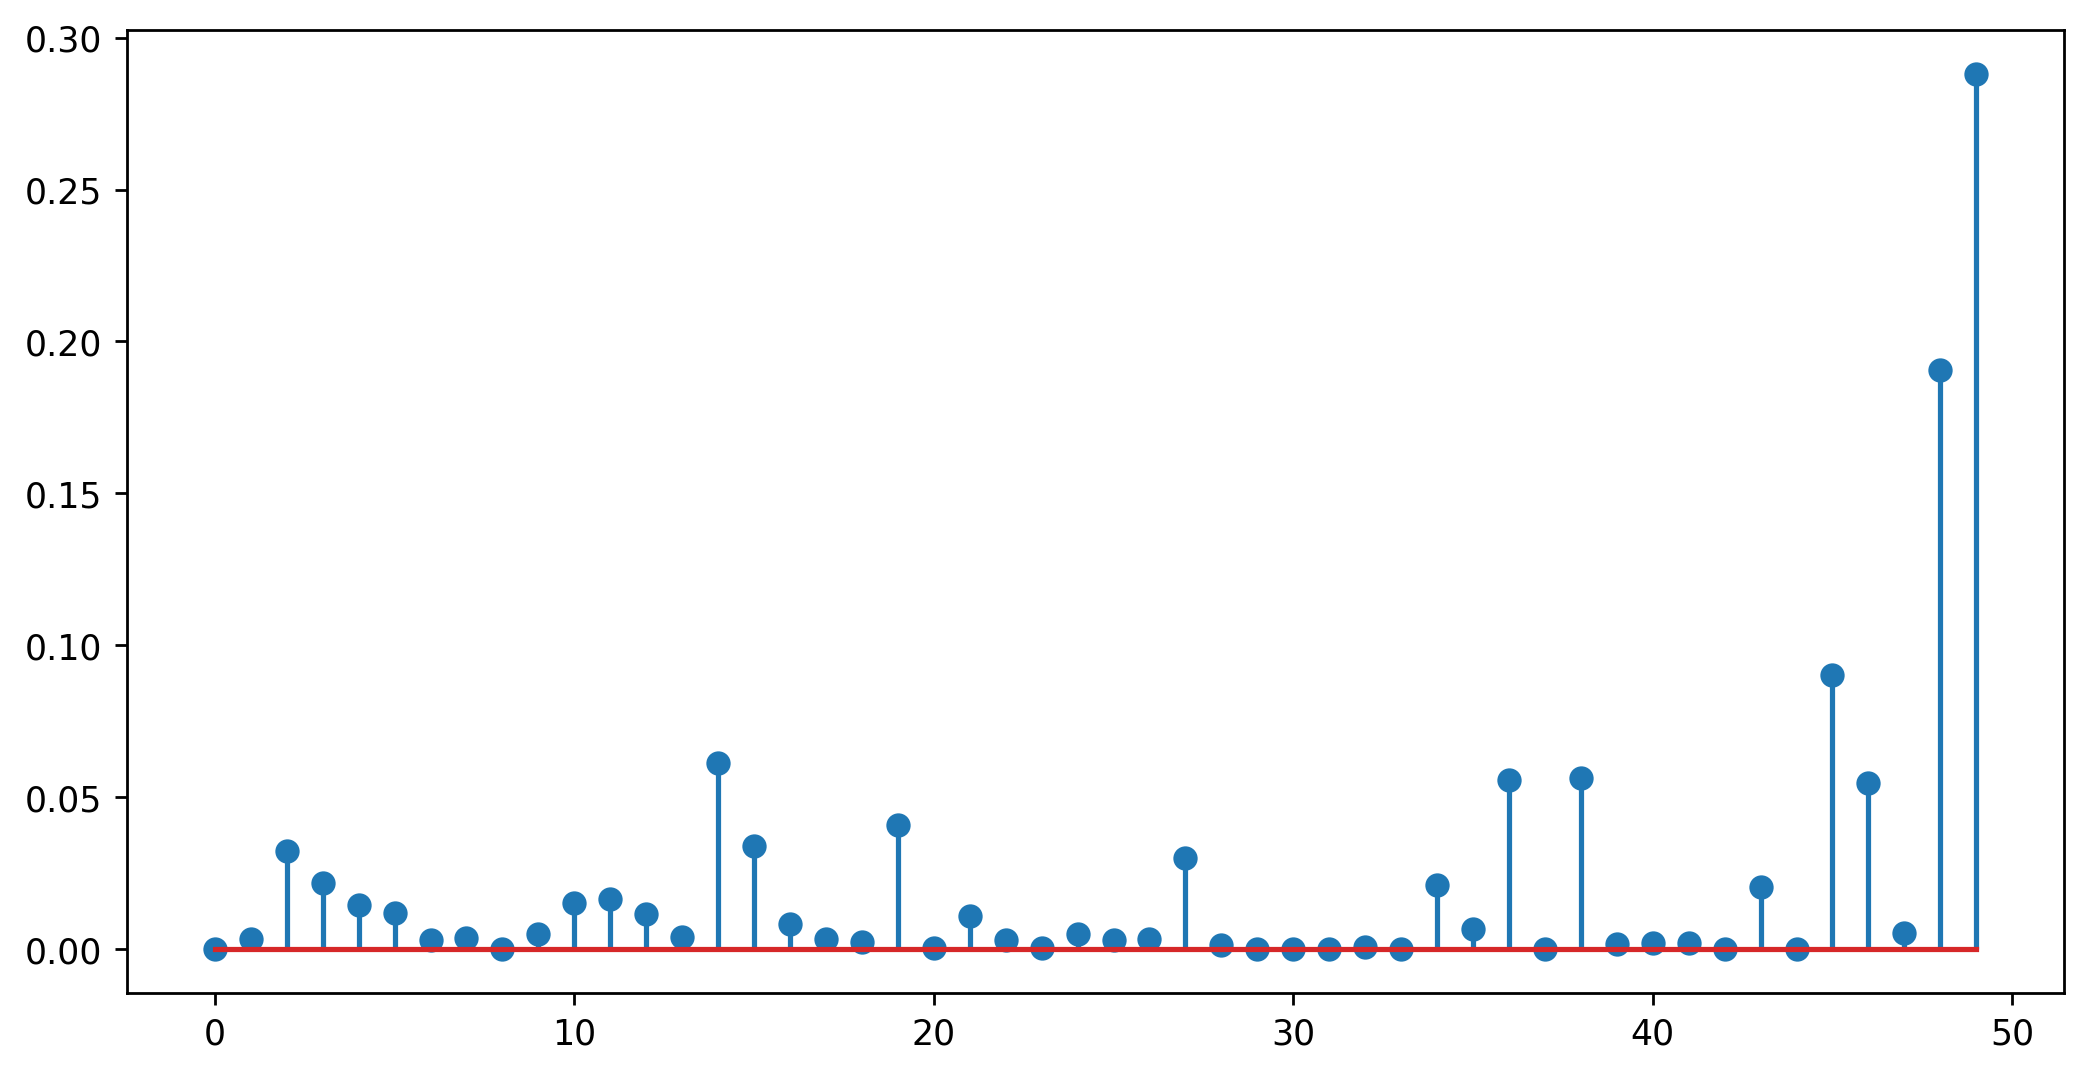

In [47]:
plt.stem(c)

In [48]:
np.argmax(c) , np.max(c)

(49, 0.2880822927543264)

In [49]:
## Here c<0.5
## Final model 
final_model=smf.ols('Profit~RDS+ADM+MS',data=df).fit()

In [50]:
# model accuracy
model.rsquared

0.9507459940683246

# Prediction for new records

In [51]:
df.head()

,RDS,ADM,MS,ST,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [52]:
newdf=pd.DataFrame({
    'RDS':[147372.41,175349],
    'ADM':[110145.34,93191],
    'MS':[473898,503199]
})

In [53]:
newdf

,RDS,ADM,MS
0,147372.41,110145.34,473898
1,175349.00,93191.00,503199


In [54]:
final_model.predict(newdf)


0    177288.099306
1    200309.601562
dtype: float64

# Models & R^2 values table

In [55]:
Table=pd.DataFrame({'Models':['model','Final Model'],
                    'R^2 Values':[model.rsquared,final_model.rsquared]})

In [56]:
Table

,Models,R^2 Values
0,model,0.950746
1,Final Model,0.961316
